In [45]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
data = pd.read_csv("diabetes.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Glucose        768 non-null    int64  
 1   BloodPressure  768 non-null    int64  
 2   Insulin        768 non-null    int64  
 3   BMI            768 non-null    float64
 4   Age            768 non-null    int64  
 5   Outcome        768 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 36.1 KB


In [53]:
data.head()

,Glucose,BloodPressure,Insulin,BMI,Age,Outcome
0,148,72,0,33.6,50,1
1,85,66,0,26.6,31,0
2,183,64,0,23.3,32,1
3,89,66,94,28.1,21,0
4,137,40,168,43.1,33,1


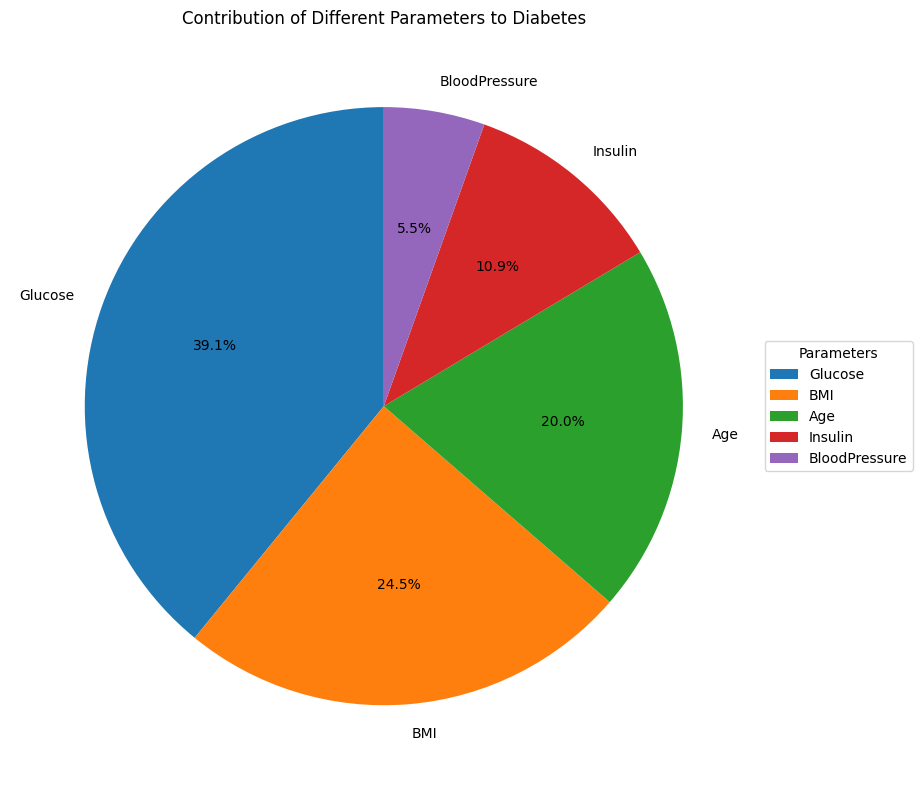


Correlation values with Diabetes:
Glucose: 0.467
BMI: 0.293
Age: 0.238
Insulin: 0.131
BloodPressure: 0.065


In [54]:
# Calculate absolute correlations with Outcome
parameters = ['Glucose', 'BMI', 'Age', 'BloodPressure', 'Insulin']
correlations = data[parameters + ['Outcome']].corr()['Outcome'].abs()
correlations = correlations[:-1]  # Remove Outcome's self-correlation

# Sort correlations
correlations_sorted = correlations.sort_values(ascending=False)

# Create pie chart
plt.figure(figsize=(10, 8))
plt.pie(correlations_sorted, 
        labels=correlations_sorted.index, 
        autopct='%1.1f%%',
        startangle=90)

# Add title
plt.title('Contribution of Different Parameters to Diabetes')

# Add legend
plt.legend(correlations_sorted.index, 
          title="Parameters",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

# Print the actual correlation values
print("\nCorrelation values with Diabetes:")
for param, corr in correlations_sorted.items():
    print(f"{param}: {corr:.3f}")

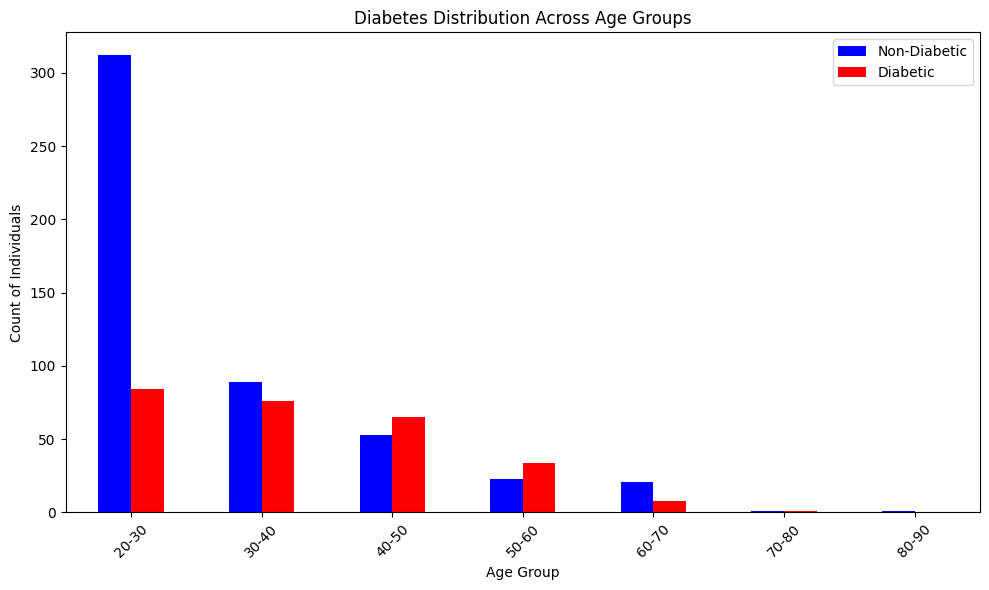

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Define age groups for categorization
age_bins = [20, 30, 40, 50, 60, 70, 80, 90]  # Example age groups
age_labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90']  # Labels for each group

# Add a new column 'AgeGroup' to categorize individuals into age groups
data['AgeGroup'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

# Count how many diabetic (Outcome=1) and non-diabetic (Outcome=0) individuals are in each age group
age_group_counts = data.groupby(['AgeGroup', 'Outcome']).size().unstack(fill_value=0)

# Plot the bar graph
age_group_counts.plot(kind='bar', stacked=False, color=['blue', 'red'], figsize=(10, 6))

# Set plot labels and title
plt.xlabel('Age Group')
plt.ylabel('Count of Individuals')
plt.title('Diabetes Distribution Across Age Groups')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(['Non-Diabetic', 'Diabetic'])
plt.tight_layout()

# Show the plot
plt.show()

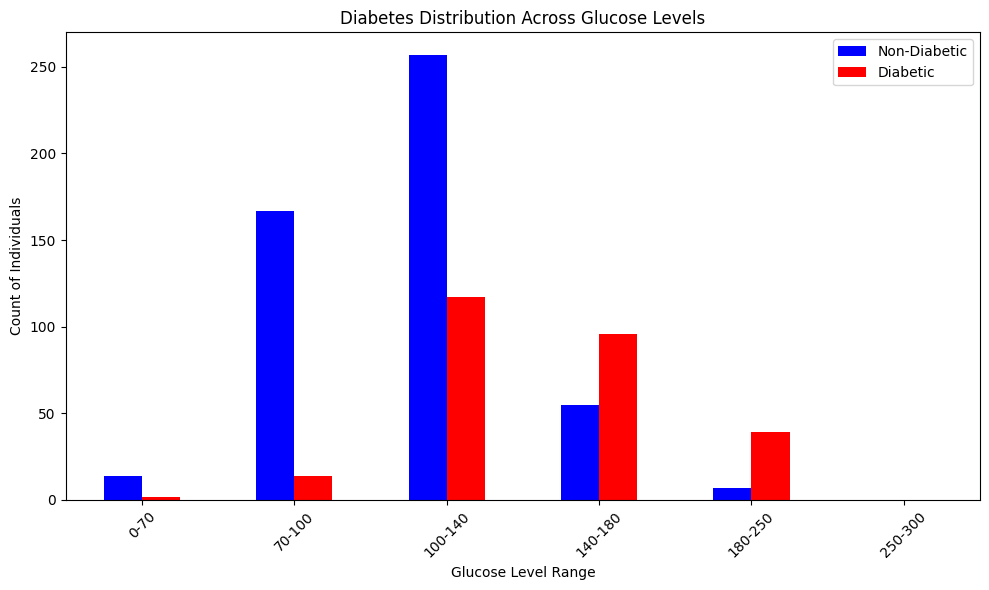

In [23]:
# Define glucose level ranges for categorization
glucose_bins = [0, 70, 100, 140, 180, 250, 300]  # Example glucose ranges
glucose_labels = ['0-70', '70-100', '100-140', '140-180', '180-250', '250-300']  # Labels for each range

# Add a new column 'GlucoseGroup' to categorize individuals into glucose groups
data['GlucoseGroup'] = pd.cut(data['Glucose'], bins=glucose_bins, labels=glucose_labels, right=False)

# Count how many diabetic (Outcome=1) and non-diabetic (Outcome=0) individuals are in each glucose group
glucose_group_counts = data.groupby(['GlucoseGroup', 'Outcome']).size().unstack(fill_value=0)

# Plot the bar graph
glucose_group_counts.plot(kind='bar', stacked=False, color=['blue', 'red'], figsize=(10, 6))

# Set plot labels and title
plt.xlabel('Glucose Level Range')
plt.ylabel('Count of Individuals')
plt.title('Diabetes Distribution Across Glucose Levels')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(['Non-Diabetic', 'Diabetic'])
plt.tight_layout()

# Show the plot
plt.show()

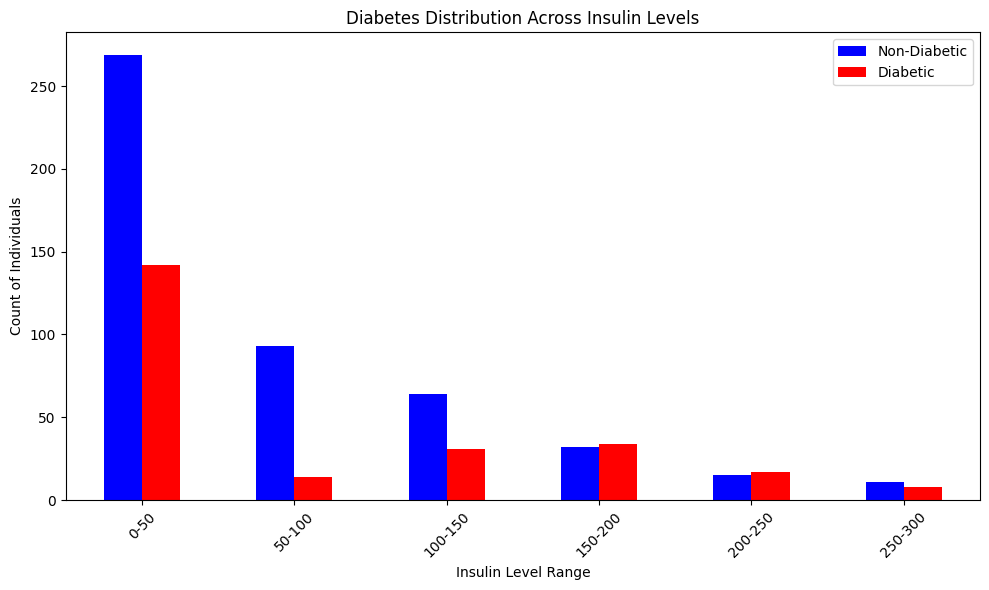

In [24]:
# Define insulin level ranges for categorization
insulin_bins = [0, 50, 100, 150, 200, 250, 300]  # Example insulin ranges
insulin_labels = ['0-50', '50-100', '100-150', '150-200', '200-250', '250-300']  # Labels for each range

# Add a new column 'InsulinGroup' to categorize individuals into insulin groups
data['InsulinGroup'] = pd.cut(data['Insulin'], bins=insulin_bins, labels=insulin_labels, right=False)

# Count how many diabetic (Outcome=1) and non-diabetic (Outcome=0) individuals are in each insulin group
insulin_group_counts = data.groupby(['InsulinGroup', 'Outcome']).size().unstack(fill_value=0)

# Plot the bar graph
insulin_group_counts.plot(kind='bar', stacked=False, color=['blue', 'red'], figsize=(10, 6))

# Set plot labels and title
plt.xlabel('Insulin Level Range')
plt.ylabel('Count of Individuals')
plt.title('Diabetes Distribution Across Insulin Levels')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(['Non-Diabetic', 'Diabetic'])
plt.tight_layout()

# Show the plot
plt.show()

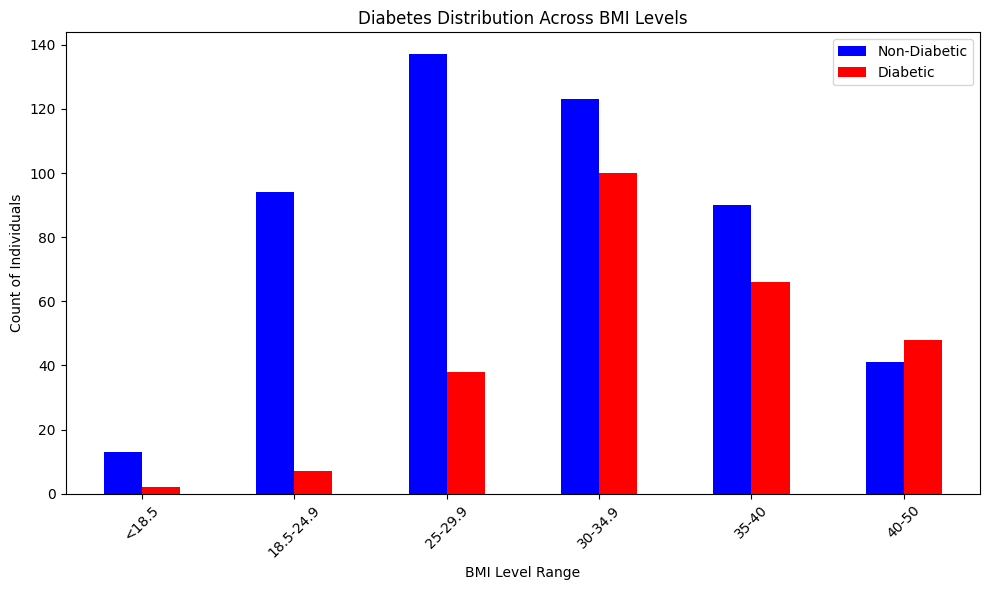

In [25]:
# Define BMI level ranges for categorization
bmi_bins = [0, 18.5, 24.9, 29.9, 34.9, 40, 50]  # Example BMI ranges (underweight, normal, overweight, obese, etc.)
bmi_labels = ['<18.5', '18.5-24.9', '25-29.9', '30-34.9', '35-40', '40-50']  # Labels for each range

# Add a new column 'BMIGroup' to categorize individuals into BMI groups
data['BMIGroup'] = pd.cut(data['BMI'], bins=bmi_bins, labels=bmi_labels, right=False)

# Count how many diabetic (Outcome=1) and non-diabetic (Outcome=0) individuals are in each BMI group
bmi_group_counts = data.groupby(['BMIGroup', 'Outcome']).size().unstack(fill_value=0)

# Plot the bar graph
bmi_group_counts.plot(kind='bar', stacked=False, color=['blue', 'red'], figsize=(10, 6))

# Set plot labels and title
plt.xlabel('BMI Level Range')
plt.ylabel('Count of Individuals')
plt.title('Diabetes Distribution Across BMI Levels')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(['Non-Diabetic', 'Diabetic'])
plt.tight_layout()

# Show the plot
plt.show()

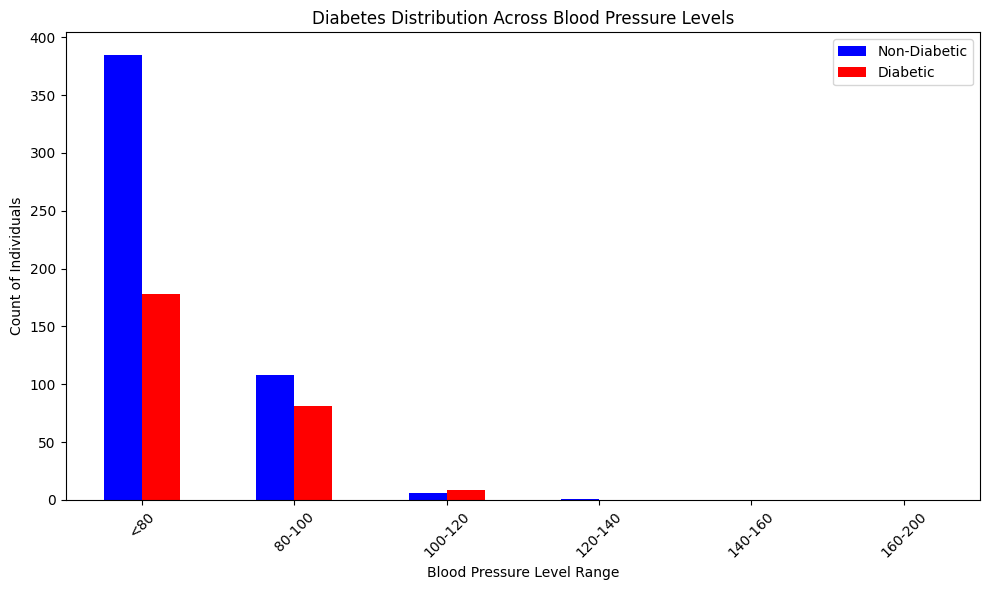

In [28]:
# Define blood pressure level ranges for categorization
bp_bins = [0, 80, 100, 120, 140, 160, 200]  # Example blood pressure ranges
bp_labels = ['<80', '80-100', '100-120', '120-140', '140-160', '160-200']  # Labels for each range

# Add a new column 'BloodPressureGroup' to categorize individuals into blood pressure groups
data['BloodPressureGroup'] = pd.cut(data['BloodPressure'], bins=bp_bins, labels=bp_labels, right=False)

# Count how many diabetic (Outcome=1) and non-diabetic (Outcome=0) individuals are in each blood pressure group
bp_group_counts = data.groupby(['BloodPressureGroup', 'Outcome']).size().unstack(fill_value=0)

# Plot the bar graph
bp_group_counts.plot(kind='bar', stacked=False, color=['blue', 'red'], figsize=(10, 6))

# Set plot labels and title
plt.xlabel('Blood Pressure Level Range')
plt.ylabel('Count of Individuals')
plt.title('Diabetes Distribution Across Blood Pressure Levels')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(['Non-Diabetic', 'Diabetic'])
plt.tight_layout()

# Show the plot
plt.show()

<Figure size 1200x1200 with 0 Axes>

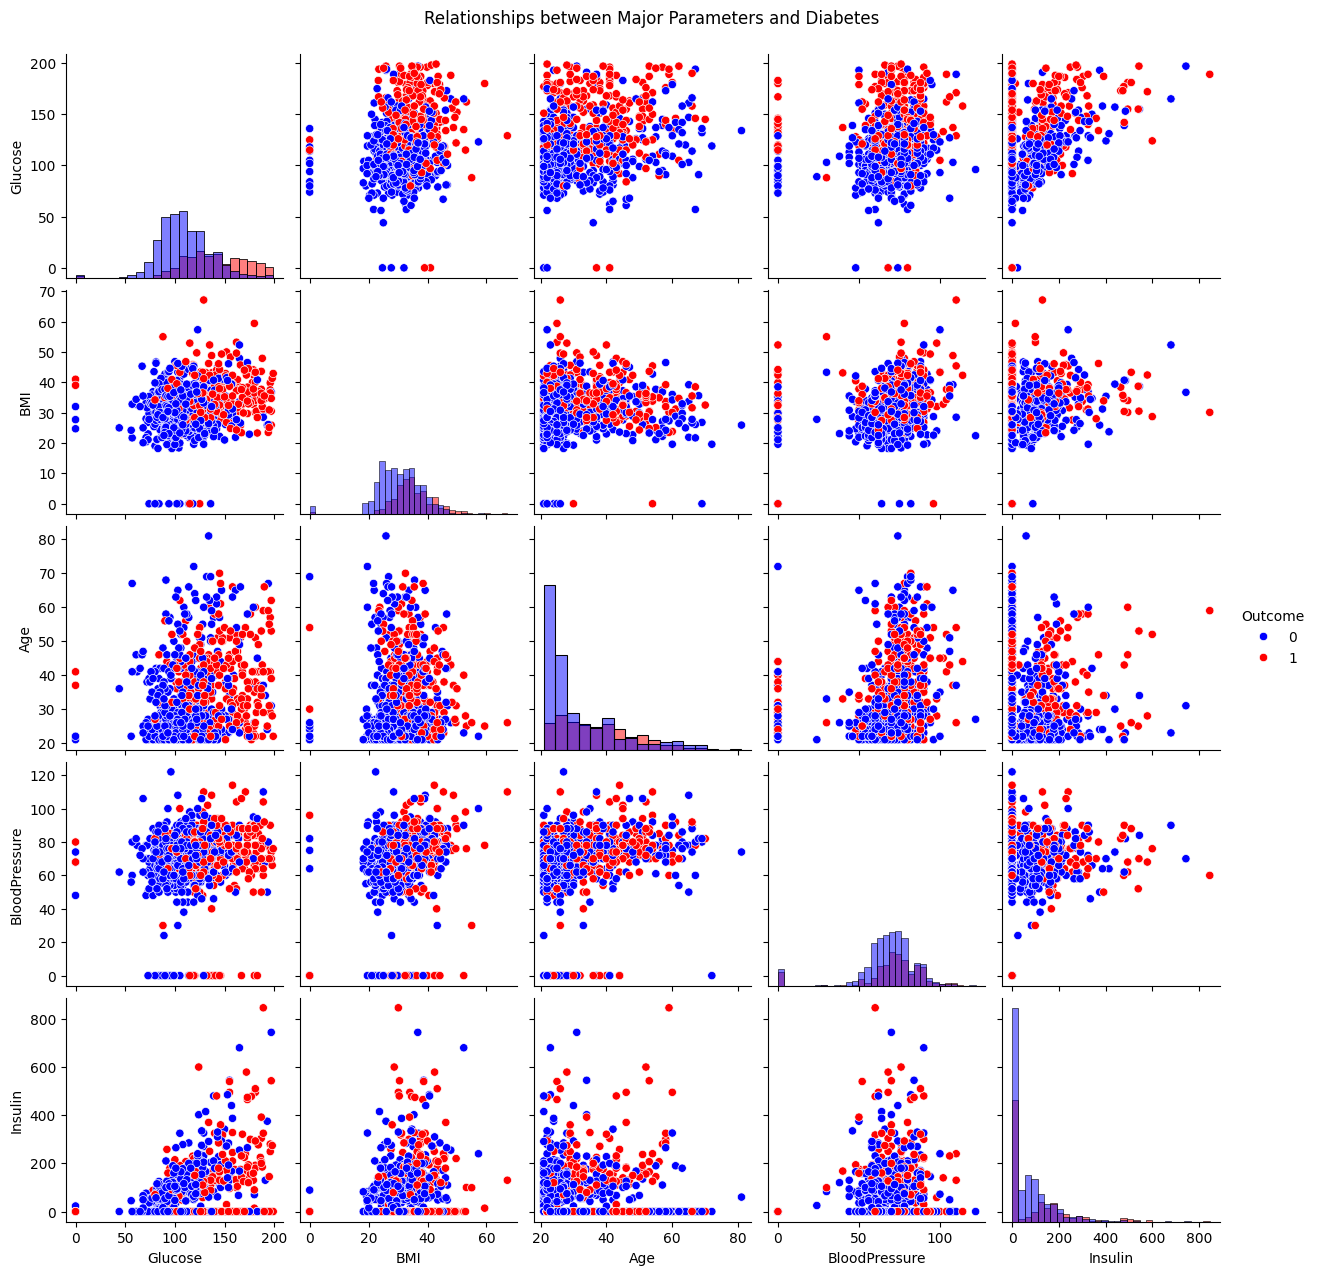


Correlations with Diabetes Outcome (excluding Outcome column):
Glucose          0.466581
BMI              0.292695
Age              0.238356
Insulin          0.130548
BloodPressure    0.065068
Name: Outcome, dtype: float64


In [ ]:
# Select the major parameters we want to analyze
parameters = ['Glucose', 'BMI', 'Age', 'BloodPressure', 'Insulin']

# Create a color palette for diabetic vs non-diabetic
colors = {0 : 'blue', 1 : 'red'}

# Create a pairs plot
plt.figure(figsize=(12, 12))
sns.pairplot(data[parameters + ['Outcome']], 
             hue='Outcome',
             palette=colors,
             diag_kind='hist')  # You can also use 'kde' for density plots

plt.suptitle('Relationships between Major Parameters and Diabetes', y=1.02)

# Show the plot
plt.show()

# Calculate correlations with Outcome
correlations = data[parameters + ['Outcome']].corr()['Outcome'].drop('Outcome').sort_values(ascending=False)

# Print the correlations
print("\nCorrelations with Diabetes")
print(correlations)